In [1]:
import os
import sys
os.chdir('..')
sys.path.append(os.getcwd())

In [2]:
import torch
from Models.pretrain import *
from Models.cPB import cPB
import torch.nn.functional as F
import numpy as np
import pandas as pd
import pickle
import argparse
from torch.autograd import Variable
import pprint
import copy
import warnings
from scipy.stats import shapiro,ttest_ind,wilcoxon
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning, module='torch.storage')
warnings.filterwarnings("ignore", category=UserWarning, module='torch.storage')
warnings.filterwarnings("ignore", category=DeprecationWarning, module='torch.storage')

# SINE Periodic

In [29]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 250
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'SINE'
dataset_name = "sine_rw10_mode5_extended_16-16_1234"
mask_option = 'DOT'  # Fixed mask_option
model_type = 'cGRU'
pretrain_task = '1'
# Initialize lists to collect tasks
batch_50_1 = []
batch_50_2 = []
batch_50_3 = []
batch_50_4 = []
end_1 = []
end_2 = []
end_3 = []
end_4 = []

# Initialize a list to store results
all_results_2 = [[] for _ in range(10)]

for i in range(1, 11):
    file_1 = f'Performance/Results/{model_type}/Periodic/{dataset}/pretrain_T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-iter{i}_periodic.pkl'
    with open(file_1, 'rb') as f:
        data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cgru_results = np.array(all_results_2)
cgru_results = [sublist[:] for sublist in cgru_results]
cgru_results = np.array(cgru_results)
cgru_results.shape

(10, 1564)

In [30]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 250
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'SINE'
dataset_name = "sine_rw10_mode5_extended_16-16_1234"
mask_option = 'SUM'  # Fixed mask_option
model_type = 'cPB'
pretrain_task = '4'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain-T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}_iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_sum = np.array(all_results_2)
cpb_results_sum = [sublist[:] for sublist in cpb_results_sum]
cpb_results_sum = np.array(cpb_results_sum)
cpb_results_sum.shape

(10, 1564)

In [31]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 250
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'SINE'
dataset_name = "sine_rw10_mode5_extended_16-16_1234"
mask_option = 'DOT'  # Fixed mask_option
model_type = 'cPB'
pretrain_task = '2'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain-T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}_iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_dot = np.array(all_results_2)
cpb_results_dot = [sublist[:] for sublist in cpb_results_dot]
cpb_results_dot = np.array(cpb_results_dot)
cpb_results_dot.shape

(10, 1564)

In [32]:
ARF_results = [[] for i in range(10)]
for i in range(1, 11):
    file_path = f'Performance/Results/ARF_results/sine_rw10_mode5_extended_16-16_1234_{i}/performance_128.pkl'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    ARF_results[i-1].append(data['ARF_batch']['batch']['kappa'][0])
ARF_results = np.array(ARF_results)
ARF_results = ARF_results.reshape(10, 1 * 1564)
ARF_results.shape

(10, 1564)

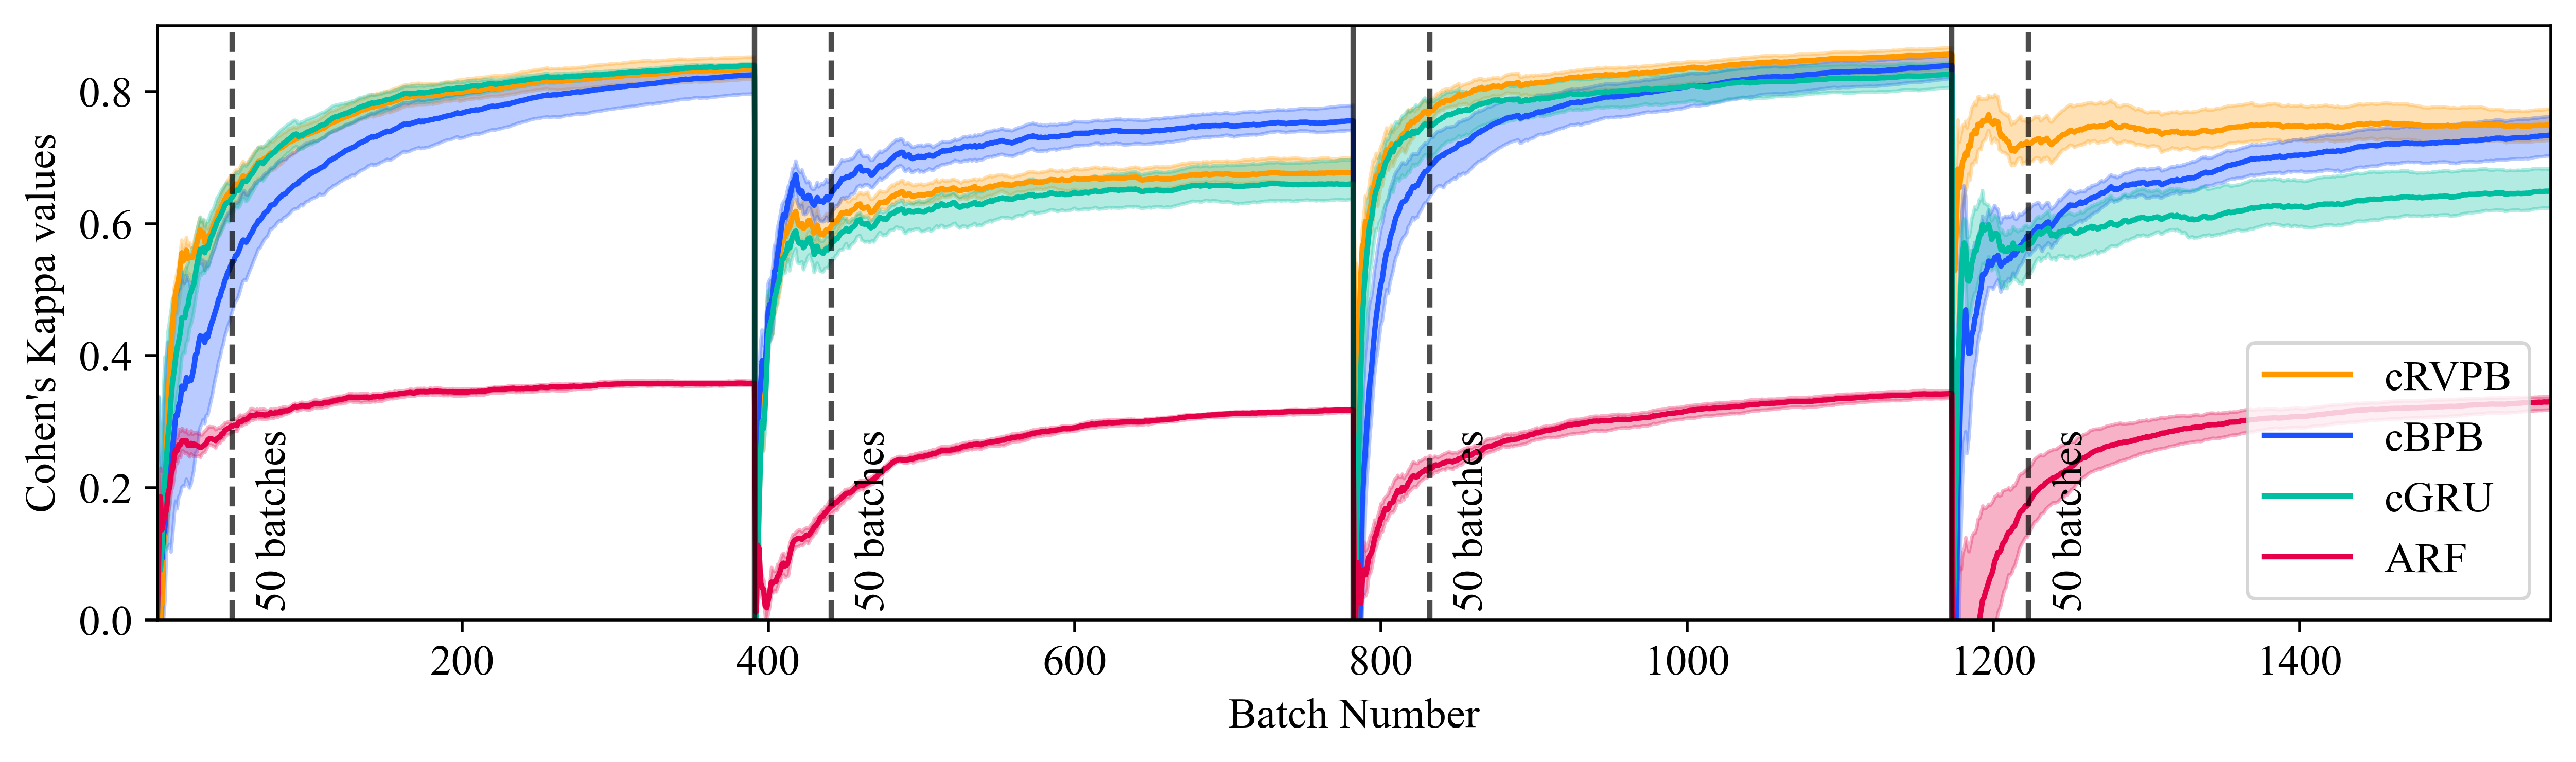

In [33]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

# Assuming cpb_results, cgru_results, crvpb_results and ARF_results are already defined and loaded
series_1 = cpb_results_dot
series_2 = cgru_results
series_3 = ARF_results
series_4 = cpb_results_sum

def cumsum_avg_chunks(series, chunk_size=391):
    n_chunks = series.shape[1] // chunk_size
    remainder = series.shape[1] % chunk_size

    # Initialize the result array
    result = np.zeros_like(series)

    # Process each chunk
    for i in range(n_chunks):
        start = i * chunk_size
        end = start + chunk_size
        chunk = series[:, start:end]
        result[:, start:end] = np.cumsum(chunk, axis=1) / np.arange(1, chunk_size + 1)

    # Process the remainder if there are leftover points
    if remainder > 0:
        start = n_chunks * chunk_size
        chunk = series[:, start:]
        result[:, start:] = np.cumsum(chunk, axis=1) / np.arange(1, remainder + 1)

    return result

# Apply the function to all series
series_1 = cumsum_avg_chunks(series_1)
series_2 = cumsum_avg_chunks(series_2)
series_3 = cumsum_avg_chunks(series_3)
series_4 = cumsum_avg_chunks(series_4)

# Calculate the mean, min, and max for each point across the 10 iterations
mean_1 = np.mean(series_1, axis=0)
min_1 = np.min(series_1, axis=0)
max_1 = np.max(series_1, axis=0)

mean_2 = np.mean(series_2, axis=0)
min_2 = np.min(series_2, axis=0)
max_2 = np.max(series_2, axis=0)

mean_3 = np.mean(series_3, axis=0)
min_3 = np.min(series_3, axis=0)
max_3 = np.max(series_3, axis=0)

mean_4 = np.mean(series_4, axis=0)
min_4 = np.min(series_4, axis=0)
max_4 = np.max(series_4, axis=0)

# Define x-axis values
iterations = range(1, 1565)  # Length of 1564

fig, ax = plt.subplots(figsize=(12, 3),dpi=500)

plt.plot(iterations, mean_4, label='cRVPB', color='#ff9900')
plt.fill_between(iterations, min_4, max_4, color='#ff9900', alpha=0.3)

plt.plot(iterations, mean_1, label='cBPB', color='#1a53ff')
plt.fill_between(iterations, min_1, max_1, color='#1a53ff', alpha=0.3)

plt.plot(iterations, mean_2, label='cGRU', color='#00bfa0')
plt.fill_between(iterations, min_2, max_2, color='#00bfa0', alpha=0.3)

plt.plot(iterations, mean_3, label='ARF', color='#e60049')
plt.fill_between(iterations, min_3, max_3, color='#e60049', alpha=0.3)



for i in range(391, 1564, 391):
    plt.axvline(x=i, color='black', linestyle='-', alpha=0.7)
for i in range(50, 1564, 391):
    plt.axvline(x=i, color='black', linestyle='--', alpha=0.7)
    plt.text(i+15, 0.15, '50 batches', rotation=90, verticalalignment='center', color='black')
ax.margins(x=0.0)
plt.ylim(0, 0.9)
plt.xlabel('Batch Number')
plt.ylabel("Cohen's Kappa values")
# plt.title('First Configuration of the SINE Data Stream')
plt.legend()
plt.savefig("Performance/Sine_periodic_models.png")
plt.show()


# SINE Anytime

In [34]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 150
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'SINE'
dataset_name = "sine_rw10_mode5_extended_16-16_1234"
mask_option = 'DOT'  # Fixed mask_option
model_type = 'cGRU'
pretrain_task = '2'
# Initialize lists to collect tasks
batch_50_1 = []
batch_50_2 = []
batch_50_3 = []
batch_50_4 = []
end_1 = []
end_2 = []
end_3 = []
end_4 = []

# Initialize a list to store results
all_results_2 = [[] for _ in range(10)]

for i in range(1, 11):
    file_1  = f'Performance/Results/{model_type}/Anytime/{dataset}/pretrain_T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-iter{i}_periodic.pkl'
    with open(file_1, 'rb') as f:
        data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cgru_results = np.array(all_results_2)
cgru_results = [sublist[:] for sublist in cgru_results]
cgru_results = np.array(cgru_results)
cgru_results.shape

(10, 200000)

In [35]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'SINE'
dataset_name = "sine_rw10_mode5_extended_16-16_1234"
mask_option = 'SUM'  # Fixed mask_option
model_type = 'cPB'
pretrain_task = '2'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Anytime2/pretrain-T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}_iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_sum = np.array(all_results_2)
cpb_results_sum = [sublist[:] for sublist in cpb_results_sum]
cpb_results_sum = np.array(cpb_results_sum)
cpb_results_sum.shape

(10, 200000)

In [36]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'SINE'
dataset_name = "sine_rw10_mode5_extended_16-16_1234"
mask_option = 'DOT'  # Fixed mask_option
model_type = 'cPB'
pretrain_task = '2'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Anytime2/pretrain-T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}_iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_dot = np.array(all_results_2)
cpb_results_dot = [sublist[:] for sublist in cpb_results_dot]
cpb_results_dot = np.array(cpb_results_dot)
cpb_results_dot.shape

(10, 200000)

In [37]:
ARFTA_results = [[] for i in range(10)]
for i in range(1, 11):
    file_path = f'Performance/Results/ARF-TA_results/sine_rw10_mode5_extended_16-16_1234_{i}/performance_128_10.pkl'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    ARFTA_results[i-1].append(data['ARF_TA_anytime']['task']['kappa'][0])
ARFTA_results = np.array(ARFTA_results)
ARFTA_results = ARFTA_results.reshape(10, 1 * 200000)
ARFTA_results.shape


(10, 200000)

In [38]:
ARF_results = [[] for i in range(10)]
for i in range(1, 11):
    file_path = f'Performance/Results/ARF_results/sine_rw10_mode5_extended_16-16_1234_{i}/performance_128.pkl'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    ARF_results[i-1].append(data['ARF_anytime']['task']['kappa'][0])
ARF_results = np.array(ARF_results)
ARF_results = ARF_results.reshape(10, 1 * 200000)
ARF_results.shape

(10, 200000)

/var/folders/hf/735hfnrs4vqf_0dbxd2809080000gn/T/ipykernel_90667/1280115898.py:69: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Performance/Sine_anytime_models.png")


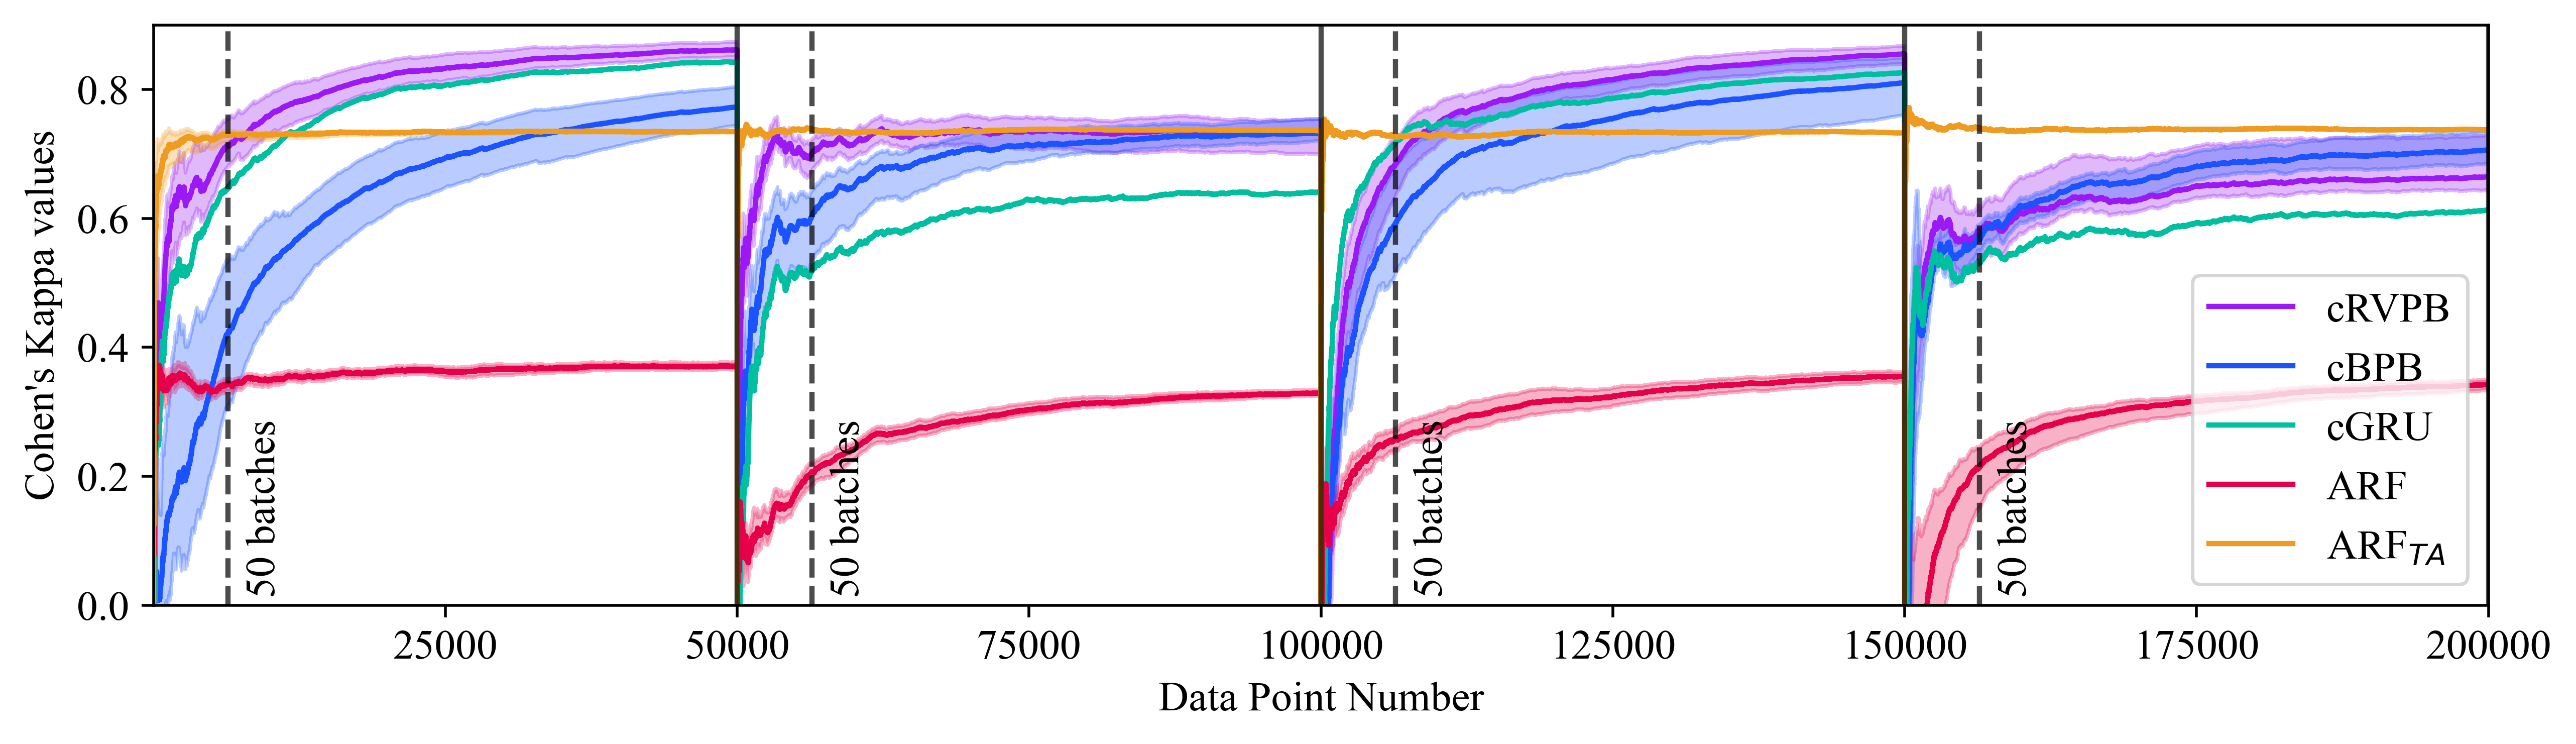

In [39]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

# Convert lists to numpy arrays for numerical operations
series_1 = np.array(cpb_results_dot)
series_5 = np.array(cpb_results_sum)  # Added new series
series_2 = np.array(cgru_results)
series_3 = np.array(ARF_results)
series_4 = np.array(ARFTA_results)


# Compute mean, min, and max for each series
mean_1 = np.mean(series_1, axis=0)
min_1 = np.min(series_1, axis=0)
max_1 = np.max(series_1, axis=0)

mean_2 = np.mean(series_2, axis=0)
min_2 = np.min(series_2, axis=0)
max_2 = np.max(series_2, axis=0)

mean_3 = np.mean(series_3, axis=0)
min_3 = np.min(series_3, axis=0)
max_3 = np.max(series_3, axis=0)

mean_4 = np.mean(series_4, axis=0)
min_4 = np.min(series_4, axis=0)
max_4 = np.max(series_4, axis=0)

mean_5 = np.mean(series_5, axis=0)  # Added calculations for new series
min_5 = np.min(series_5, axis=0)
max_5 = np.max(series_5, axis=0)

# Plotting
iterations = range(1, 200001)  # Length of 96420 after removing the first element

fig, ax = plt.subplots(figsize=(12, 3), dpi=500)

plt.plot(iterations, mean_5, label='cRVPB', color='#9b19f5')  # Added new plot
plt.fill_between(iterations, min_5, max_5, color='#9b19f5', alpha=0.3)

plt.plot(iterations, mean_1, label='cBPB', color='#1a53ff')
plt.fill_between(iterations, min_1, max_1, color='#1a53ff', alpha=0.3)

plt.plot(iterations, mean_2, label='cGRU', color='#00bfa0')
plt.fill_between(iterations, min_2, max_2, color='#00bfa0', alpha=0.3)

plt.plot(iterations, mean_3, label='ARF', color='#e60049')
plt.fill_between(iterations, min_3, max_3, color='#e60049', alpha=0.3)

plt.plot(iterations, mean_4, label='ARF$_{TA}$', color='#ef9b20')
plt.fill_between(iterations, min_4, max_4, color='#ef9b20', alpha=0.3)



for i in range(50000, 200001, 50000):
    plt.axvline(x=i, color='black', linestyle='-', alpha=0.7)
for i in range(50*128, 200001, 50000):
    plt.axvline(x=i, color='black', linestyle='--', alpha=0.7)
    plt.text(i+1500, 0.15, '50 batches', rotation=90, verticalalignment='center', color='black')

ax.margins(x=0.0)
plt.ylim(0, 0.9)
plt.xlabel('Data Point Number')
plt.ylabel("Cohen's Kappa values")
# plt.title('First Configuration of the SINE Data Stream')
plt.legend()

plt.savefig("Performance/Sine_anytime_models.png")
plt.show()


# Weather periodic

In [40]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'Weather'
dataset_name = "weather_st124_1conf"
mask_option = 'DOT'  # Fixed mask_option
model_type = 'cGRU'
pretrain_task = '1'
# Initialize lists to collect tasks
batch_50_1 = []
batch_50_2 = []
batch_50_3 = []
batch_50_4 = []
end_1 = []
end_2 = []
end_3 = []
end_4 = []

# Initialize a list to store results
all_results_2 = [[] for _ in range(10)]

for i in range(1, 11):
    file_1 = f'Performance/Results/{model_type}/Periodic/{dataset}/pretrain_T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-iter{i}_periodic.pkl'
    with open(file_1, 'rb') as f:
        data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cgru_results = np.array(all_results_2)
cgru_results = [sublist[:] for sublist in cgru_results]
cgru_results = np.array(cgru_results)
cgru_results.shape

(10, 756)

In [41]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 50

epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'Weather'
dataset_name = "weather_st124_1conf"
mask_option = 'SUM'  # Fixed mask_option
model_type = 'cPB'
pretrain_task = '1'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_sum = np.array(all_results_2)
cpb_results_sum = [sublist[:] for sublist in cpb_results_sum]
cpb_results_sum = np.array(cpb_results_sum)
cpb_results_sum.shape

(10, 756)

In [42]:
# Define parameters
base_model = 'GRU'
batch_size = 128
hidden_size = 50

epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch = 50
mask_init = 'uniform'
dataset = 'Weather'
dataset_name = "weather_st124_1conf"
mask_option = 'DOT'  # Fixed mask_option
model_type = 'cPB'
pretrain_task = '1'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_dot = np.array(all_results_2)
cpb_results_dot = [sublist[:] for sublist in cpb_results_dot]
cpb_results_dot = np.array(cpb_results_dot)
cpb_results_dot.shape

(10, 756)

In [43]:
ARF_results = [[] for i in range(10)]
for i in range(0, 10):
    file_path = f'Performance/Results/ARF_results/weather_st124_1conf/performance_128.pkl'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    ARF_results[i-1].append(data['ARF_batch']['batch']['kappa'][i])
ARF_results = np.array(ARF_results)
ARF_results = ARF_results.reshape(10, 1 * 756)
ARF_results.shape

(10, 756)

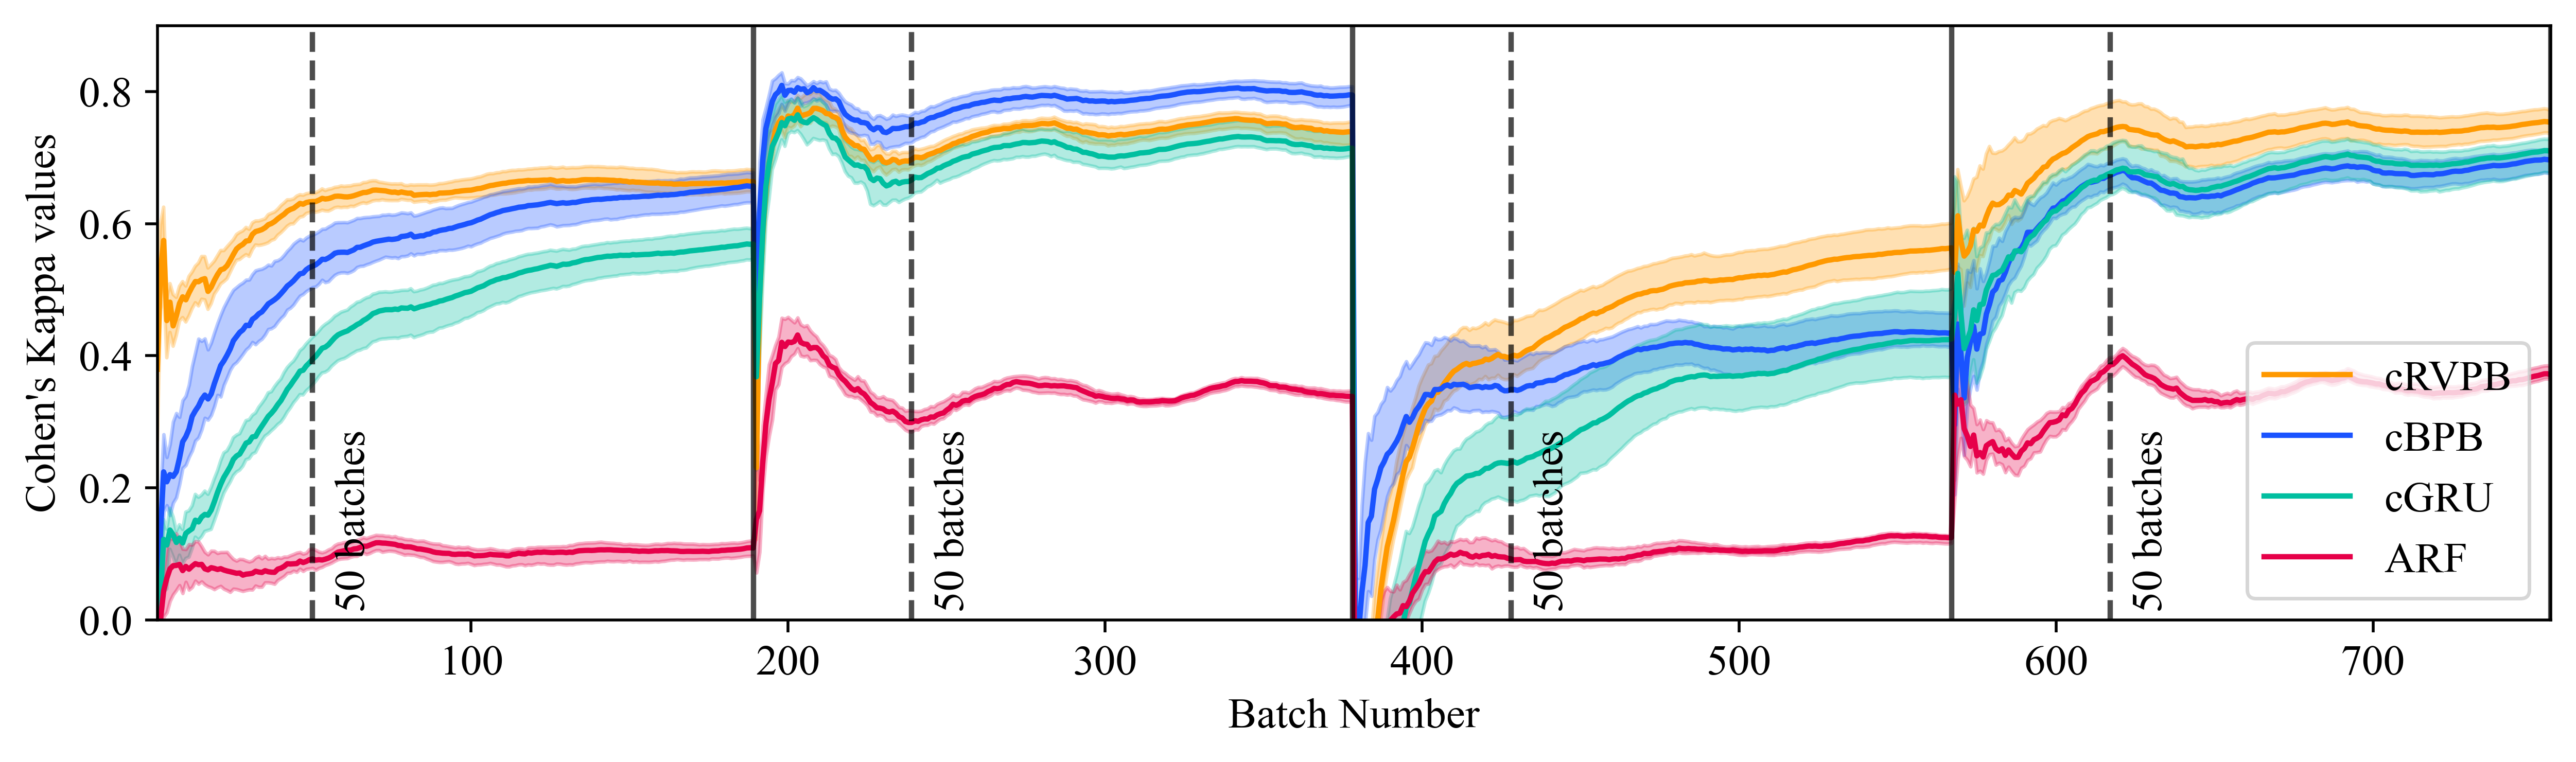

In [44]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

# Assuming cpb_results, cgru_results, crvpb_results and ARF_results are already defined and loaded
series_1 = cpb_results_dot
series_2 = cgru_results
series_3 = ARF_results
series_4 = cpb_results_sum

def cumsum_avg_chunks(series, chunk_size=189):
    n_chunks = series.shape[1] // chunk_size
    remainder = series.shape[1] % chunk_size

    # Initialize the result array
    result = np.zeros_like(series)

    # Process each chunk
    for i in range(n_chunks):
        start = i * chunk_size
        end = start + chunk_size
        chunk = series[:, start:end]
        result[:, start:end] = np.cumsum(chunk, axis=1) / np.arange(1, chunk_size + 1)

    # Process the remainder if there are leftover points
    if remainder > 0:
        start = n_chunks * chunk_size
        chunk = series[:, start:]
        result[:, start:] = np.cumsum(chunk, axis=1) / np.arange(1, remainder + 1)

    return result

# Apply the function to all series
series_1 = cumsum_avg_chunks(series_1)
series_2 = cumsum_avg_chunks(series_2)
series_3 = cumsum_avg_chunks(series_3)
series_4 = cumsum_avg_chunks(series_4)

# Calculate the mean, min, and max for each point across the 10 iterations
mean_1 = np.mean(series_1, axis=0)
min_1 = np.min(series_1, axis=0)
max_1 = np.max(series_1, axis=0)

mean_2 = np.mean(series_2, axis=0)
min_2 = np.min(series_2, axis=0)
max_2 = np.max(series_2, axis=0)

mean_3 = np.mean(series_3, axis=0)
min_3 = np.min(series_3, axis=0)
max_3 = np.max(series_3, axis=0)

mean_4 = np.mean(series_4, axis=0)
min_4 = np.min(series_4, axis=0)
max_4 = np.max(series_4, axis=0)

# Define x-axis values
iterations = range(1, 757)  # Length of 1564

fig, ax = plt.subplots(figsize=(12, 3),dpi=500)

plt.plot(iterations, mean_4, label='cRVPB', color='#ff9900')
plt.fill_between(iterations, min_4, max_4, color='#ff9900', alpha=0.3)

plt.plot(iterations, mean_1, label='cBPB', color='#1a53ff')
plt.fill_between(iterations, min_1, max_1, color='#1a53ff', alpha=0.3)

plt.plot(iterations, mean_2, label='cGRU', color='#00bfa0')
plt.fill_between(iterations, min_2, max_2, color='#00bfa0', alpha=0.3)

plt.plot(iterations, mean_3, label='ARF', color='#e60049')
plt.fill_between(iterations, min_3, max_3, color='#e60049', alpha=0.3)



for i in range(189, 757, 189):
    plt.axvline(x=i, color='black', linestyle='-', alpha=0.7)
for i in range(50, 757, 189):
    plt.axvline(x=i, color='black', linestyle='--', alpha=0.7)
    plt.text(i+7, 0.15, '50 batches', rotation=90, verticalalignment='center', color='black')
ax.margins(x=0.0)
plt.ylim(0, 0.9)
plt.xlabel('Batch Number')
plt.ylabel("Cohen's Kappa values")
# plt.title('First Configuration of the Weather Data Stream')
plt.legend()
plt.savefig("Performance/Weather_periodic_models.png")
plt.show()


# Weather anytime

In [45]:
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch =50
input_size = 4
mask_init = 'uniform'
dataset = 'Weather'
dataset_name = "weather_st124_4conf"
mask_option = 'SUM'
model_type = 'cGRU'
batch_first = True
low_rank = False
pretrain_task = '1'
# Initialize lists to collect tasks
batch_50_1 = []
batch_50_2 = []
batch_50_3 = []
batch_50_4 = []
end_1 = []
end_2 = []
end_3 = []
end_4 = []

# Initialize a list to store results
all_results_2 = [[] for _ in range(10)]

for i in range(1, 11):
    file_1  = f'Performance/Results/{model_type}/Anytime/{dataset}/pretrain_T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-iter{i}_periodic.pkl'
    with open(file_1, 'rb') as f:
        data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cgru_results = np.array(all_results_2)
cgru_results = [sublist[:] for sublist in cgru_results]
cgru_results = np.array(cgru_results)
cgru_results.shape

(10, 96420)

In [46]:
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch =50
input_size = 4
mask_init = 'uniform'
dataset = 'Weather'
dataset_name = "weather_st124_1conf"
mask_option = 'SUM'
model_type = 'cPB'
batch_first = True
low_rank = False
pretrain_task = '1'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Anytime2/pretrain-T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}_iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_sum = np.array(all_results_2)
cpb_results_sum = [sublist[:] for sublist in cpb_results_sum]
cpb_results_sum = np.array(cpb_results_sum)
cpb_results_sum.shape

(10, 96420)

In [47]:
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size = 10
lr = 0.01
number_of_tasks = 4
mask_selection_NofBatch =50
input_size = 4
mask_init = 'uniform'
dataset = 'Weather'
dataset_name = "weather_st124_1conf"
mask_option = 'DOT'
model_type = 'cPB'
batch_first = True
low_rank = False
pretrain_task = '1'


batch_50_1_1 = []
batch_50_2_1 = []
batch_50_3_1 = []
batch_50_4_1 = []
end_1_1 = []
end_2_1 = []
end_3_1 = []
end_4_1 = []

all_results_1= [[] for i in range(0,8)]
for i in range (1,11):
  # file_1 = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{i}.pkl'
  file_1  = f'Performance/Results/{model_type}/{dataset}/Anytime2/pretrain-T{pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}_iter{i}.pkl'

  with open(file_1, 'rb') as f:
    data1 = pickle.load(f)
    ss1 = [item for item in data1['task_1']['kappa']]

    ss2 = [item for item in data1['task_2']['kappa']]

    ss3 = [item for item in data1['task_3']['kappa']]

    ss4 = [item for item in data1['task_4']['kappa']]
    concat = np.concatenate([ss1,ss2,ss3,ss4])

    all_results_2[i-1] = concat

cpb_results_dot = np.array(all_results_2)
cpb_results_dot = [sublist[:] for sublist in cpb_results_dot]
cpb_results_dot = np.array(cpb_results_dot)
cpb_results_dot.shape

(10, 96420)

In [48]:
ARFTA_results = [[] for i in range(10)]
for i in range(0, 10):
    file_path = f'Performance/Results/ARF-TA_results/weather_st124_1conf/performance_128_11.pkl'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    ARFTA_results[i-1].append(data['ARF_TA_anytime']['task']['kappa'][i])
ARFTA_results = np.array(ARFTA_results)
ARFTA_results = ARFTA_results.reshape(10, 1 * 96420)
ARFTA_results.shape


(10, 96420)

In [49]:
ARF_results = [[] for i in range(10)]
for i in range(0, 10):
    file_path = f'Performance/Results/ARF_results/weather_st124_1conf/performance_128.pkl'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    ARF_results[i-1].append(data['ARF_anytime']['task']['kappa'][i])
ARF_results = np.array(ARF_results)
ARF_results = ARF_results.reshape(10, 1 * 96420)
ARF_results.shape

(10, 96420)

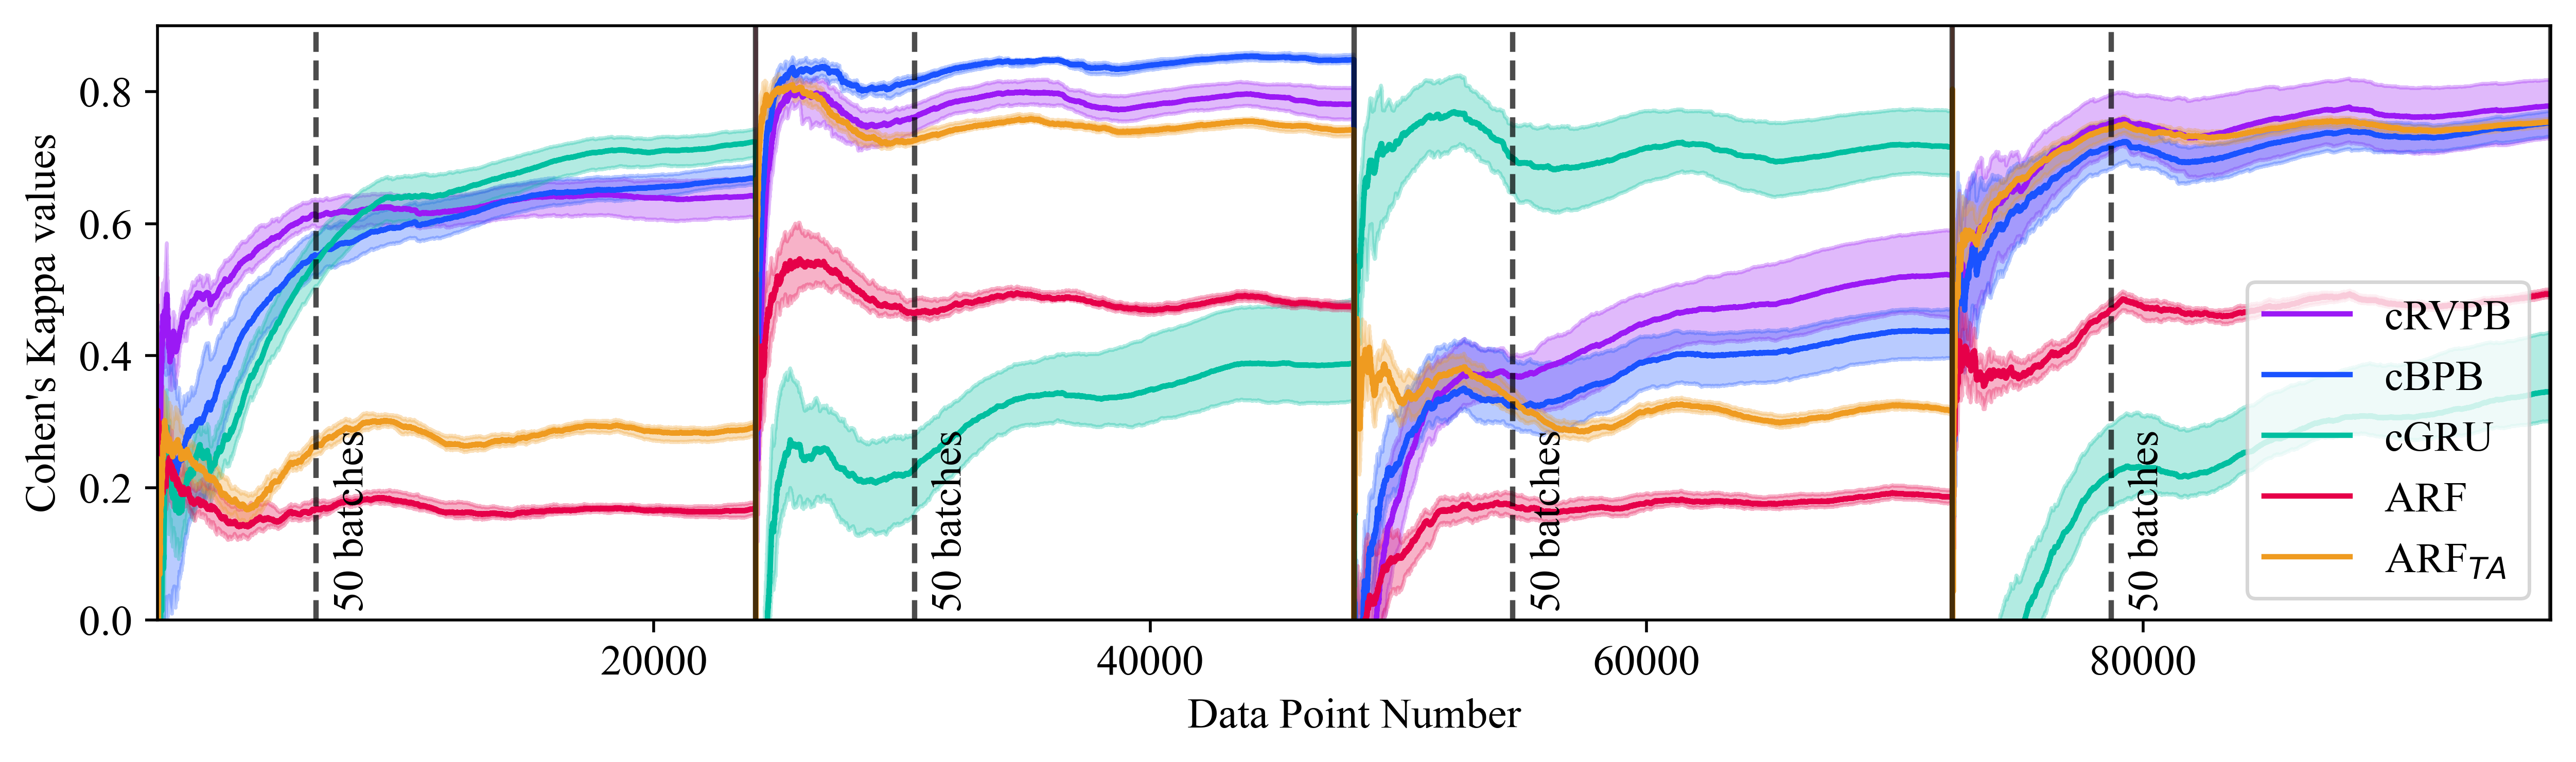

In [50]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

# Convert lists to numpy arrays for numerical operations
series_1 = np.array(cpb_results_dot)
series_5 = np.array(cpb_results_sum)  # Added new series
series_2 = np.array(cgru_results)
series_3 = np.array(ARF_results)
series_4 = np.array(ARFTA_results)


# Compute mean, min, and max for each series
mean_1 = np.mean(series_1, axis=0)
min_1 = np.min(series_1, axis=0)
max_1 = np.max(series_1, axis=0)

mean_2 = np.mean(series_2, axis=0)
min_2 = np.min(series_2, axis=0)
max_2 = np.max(series_2, axis=0)

mean_3 = np.mean(series_3, axis=0)
min_3 = np.min(series_3, axis=0)
max_3 = np.max(series_3, axis=0)

mean_4 = np.mean(series_4, axis=0)
min_4 = np.min(series_4, axis=0)
max_4 = np.max(series_4, axis=0)

mean_5 = np.mean(series_5, axis=0)  # Added calculations for new series
min_5 = np.min(series_5, axis=0)
max_5 = np.max(series_5, axis=0)

# Plotting
iterations = range(1, 96421)

fig, ax = plt.subplots(figsize=(12, 3), dpi=500)

plt.plot(iterations, mean_5, label='cRVPB', color='#9b19f5')  # Added new plot
plt.fill_between(iterations, min_5, max_5, color='#9b19f5', alpha=0.3)

plt.plot(iterations, mean_1, label='cBPB', color='#1a53ff')
plt.fill_between(iterations, min_1, max_1, color='#1a53ff', alpha=0.3)

plt.plot(iterations, mean_2, label='cGRU', color='#00bfa0')
plt.fill_between(iterations, min_2, max_2, color='#00bfa0', alpha=0.3)

plt.plot(iterations, mean_3, label='ARF', color='#e60049')
plt.fill_between(iterations, min_3, max_3, color='#e60049', alpha=0.3)

plt.plot(iterations, mean_4, label='ARF$_{TA}$', color='#ef9b20')
plt.fill_between(iterations, min_4, max_4, color='#ef9b20', alpha=0.3)



for i in range(24105, 96421, 24105):
    plt.axvline(x=i, color='black', linestyle='-', alpha=0.7)
for i in range(50*128, 96421, 24105):
    plt.axvline(x=i, color='black', linestyle='--', alpha=0.7)
    plt.text(i+680, 0.15, '50 batches', rotation=90, verticalalignment='center', color='black')

ax.margins(x=0.0)
plt.ylim(0, 0.9)
plt.xlabel('Data Point Number')
plt.ylabel("Cohen's Kappa values")
# plt.title('First Configuration of the SINE Data Stream')
plt.legend()

plt.savefig("Performance/Weather_anytime_models.png")
plt.show()
